In [1]:
import sys
import os
from copy import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
mlt.__version__

'3.3.3'

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
import tensorflow.keras as keras

from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Concatenate, Dot, Lambda, Input, Dropout,ZeroPadding2D, Activation, concatenate, BatchNormalization, Conv1D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import optimizers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras import backend as K

In [52]:
#path_dataset = r"/content/drive/MyDrive/final dataset1"
#path_dataset = r"E:/final dataset1"
path_dataset = r"E://final dataset1"
dir_list = next(os.walk(path_dataset))[1]
dir_list.sort()
len(dir_list)

486

In [5]:
dir_list = shuffle(dir_list)

In [6]:
dir_list[:20]

['224',
 '452',
 '583',
 '451',
 '392',
 '80',
 '53',
 '101',
 '233',
 '341',
 '254',
 '217',
 '210',
 '162',
 '200',
 '44',
 '25',
 '263',
 '480',
 '336']

In [7]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path_dataset+ '/' +directory)
    images.sort()
    images = [path_dataset+'/' +directory+'/'+x for x in images]
    forg_groups.append(images[:15])
    orig_groups.append(images[15:])

In [8]:
print(len(orig_groups))
print(len(forg_groups))
print(len(orig_groups[0]))
print(len(forg_groups[0]))

486
486
5
15


In [9]:
orig_groups, forg_groups = shuffle(orig_groups, forg_groups)

In [10]:
orig_groups[10], forg_groups[10]

(['E://final dataset1/126/126_ORG_01.jpg',
  'E://final dataset1/126/126_ORG_02.jpg',
  'E://final dataset1/126/126_ORG_03.jpg',
  'E://final dataset1/126/126_ORG_04.jpg',
  'E://final dataset1/126/126_ORG_05.jpg'],
 ['E://final dataset1/126/126_FORG_01.jpg',
  'E://final dataset1/126/126_FORG_02.jpg',
  'E://final dataset1/126/126_FORG_03.jpg',
  'E://final dataset1/126/126_FORG_04.jpg',
  'E://final dataset1/126/126_FORG_05.jpg',
  'E://final dataset1/126/126_FORG_06.jpg',
  'E://final dataset1/126/126_FORG_07.jpg',
  'E://final dataset1/126/126_FORG_08.jpg',
  'E://final dataset1/126/126_FORG_09.jpg',
  'E://final dataset1/126/126_FORG_10.jpg',
  'E://final dataset1/126/126_FORG_11.jpg',
  'E://final dataset1/126/126_FORG_12.jpg',
  'E://final dataset1/126/126_FORG_13.jpg',
  'E://final dataset1/126/126_FORG_14.jpg',
  'E://final dataset1/126/126_FORG_15.jpg'])

In [11]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]
print(orig_lengths)
print(forg_lengths)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 15, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [13]:
orig_train, orig_val = orig_groups[:400], orig_groups[400:]
forg_train, forg_val = forg_groups[:400], forg_groups[400:]

In [14]:
len(orig_train), len(orig_val), len(forg_train), len(forg_val)

(400, 86, 400, 86)

In [15]:
img_h, img_w, img_ch = 150, 300, 1
image_shape = (img_h, img_w, img_ch)
image_shape


(150, 300, 1)

In [16]:
orig_train[0], orig_val[0]

(['E://final dataset1/130/130_ORG_01.jpg',
  'E://final dataset1/130/130_ORG_02.jpg',
  'E://final dataset1/130/130_ORG_03.jpg',
  'E://final dataset1/130/130_ORG_04.jpg',
  'E://final dataset1/130/130_ORG_05.jpg'],
 ['E://final dataset1/275/275_ORG_01.jpg',
  'E://final dataset1/275/275_ORG_02.jpg',
  'E://final dataset1/275/275_ORG_03.jpg',
  'E://final dataset1/275/275_ORG_04.jpg',
  'E://final dataset1/275/275_ORG_05.jpg'])

In [17]:
def visualize_sample_signature(choose=False,idx=0):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 7))
    
    if choose:
        k = idx
    else:
        k = np.random.randint(len(orig_groups))
    print(k)

    orig_img_names = random.sample(orig_groups[k], 2)
    forg_img_name = random.sample(forg_groups[k], 1)
    print(orig_img_names+forg_img_name)

    orig_img1 = cv2.imread(orig_img_names[0])
    orig_img2 = cv2.imread(orig_img_names[1])
    forg_img = plt.imread(forg_img_name[0])

    orig_img1 = cv2.resize(orig_img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
    forg_img = cv2.resize(forg_img, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.set_xlabel(1)
    # ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.set_xlabel(2)
    # ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.set_xlabel(3)
    # ax3.axis('off')
    plt.tight_layout()
    plt.show()

25
['E://final dataset1/581/581_ORG_01.jpg', 'E://final dataset1/581/581_ORG_02.jpg', 'E://final dataset1/581/581_FORG_09.jpg']


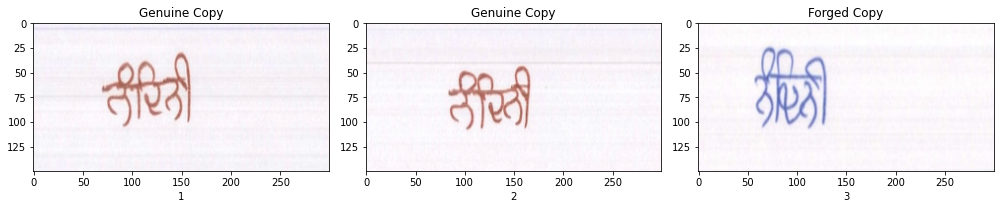

In [18]:
visualize_sample_signature(choose=True,idx=25)

In [19]:
num_samples = 0
pairss = []
num_samples

0

In [20]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=20)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized_blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  return resized_binary

In [21]:
def generate_batch(orig_data, forg_data, batch_size = 32):

    # global num_samples, pairss

    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 24 genuine signatures, hence we have 
        # 24 choose 2 = 276 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 24 * 12 = 288 Genuine-Forged image pairs for one person.
        # In all we have 120 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 160 * 276 = 44160
        # Total number of Genuine-Forged pairs = 160 * 288 = 46080
        # Total no. of data points = 44160 + 46080 = 90240

        for orig, forg in zip(orig_data, forg_data):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)

        # print(len(all_pairs))
        # num_samples = len(all_pairs) 
        # pairss = all_pairs

        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            # img1 = preprocessor_img(pair[0], (img_w, img_h))
            # img2 = preprocessor_img(pair[1], (img_w, img_h))
            img1 = cv2.imread(pair[0],0)
            img2 = cv2.imread(pair[1],0)
            img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
            img1 = img1.astype('float32')
            img2 = img2.astype('float32')
            img1 /= 255
            img2 /= 255
            img1 = np.atleast_3d(img1)
            img2 = np.atleast_3d(img2)
            # img2 = img2[...,np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]

            k += 1
            if k == batch_size:
                # yield np.array(pairs), np.array(targets)
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
                targets=np.zeros((batch_size,))

In [22]:
ff = generate_batch(orig_train, forg_train, batch_size = 32)
pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [23]:
num_samples

0

In [24]:
print(pairs.shape)
print(targets.shape)

(2, 32, 150, 300, 1)
(32,)


In [25]:
print(pairs[0].shape)

(32, 150, 300, 1)


In [26]:
print(targets)

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0.]


In [27]:
#from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import ResNet50

base_network = ResNet50(weights=None, include_top=False, input_shape=image_shape)
base_network.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 306, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 150, 64)  3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 150, 64)  256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [28]:
base_network.trainable = False

In [29]:
# Define the tensors for the two input images
left_input = Input(image_shape)
right_input = Input(image_shape)
# Convolutional Neural Network
model = Sequential()
model.add(base_network)
model.add(Flatten())
# Generate the encodings (feature vectors) for the two images
encoded_l = model(left_input)
encoded_r = model(right_input)
# Add a customized layer to compute the absolute difference between the encodings
merge_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))([encoded_l, encoded_r])
# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = Dense(1,activation='sigmoid')(merge_layer)
# Connect the inputs with the outputs
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
siamese_net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 102400)       23581440    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 102400)       0           sequential[0][0]             

In [30]:
batch_sz = 100
num_train_samples = 105*len(orig_train) + 120*len(orig_train)
num_val_samples = num_test_samples = 105*len(orig_val) + 120*len(orig_val)
num_train_samples, num_val_samples, num_test_samples, num_train_samples//batch_sz

(90000, 19350, 19350, 900)

In [38]:
callbacks = [
  EarlyStopping(patience=15, restore_best_weights=True),
  CSVLogger(r"E:/nancy/svm/model_history_log.csv", append=True),
  # ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001),
  ModelCheckpoint(r"E:/nancy/svm/signet-{epoch:003d}.h5py"),
  # ModelCheckpoint(r"/content/drive/MyDrive/graduation project (ML)/model_5/signet_Best_Model.h5", save_best_only=True)
]

In [39]:
siamese_net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 102400)       23581440    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 102400)       0           sequential[0][0]             

In [40]:
adam = Adam(lr=1e-6)
siamese_net.compile(loss = "binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [41]:
new_history = siamese_net.fit(  generate_batch(orig_train, forg_train, batch_sz),
                                steps_per_epoch = num_train_samples//batch_sz,
                                epochs=20,
                                validation_data = generate_batch(orig_val, forg_val, batch_sz),
                                validation_steps = num_val_samples//batch_sz,
                                callbacks = callbacks
                                )

Epoch 1/20
900/900 [==============================] - 5709s 6s/step - loss: 0.3910 - accuracy: 0.8532 - val_loss: 0.3830 - val_accuracy: 0.8569


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-001.h5py\assets
Epoch 2/20
900/900 [==============================] - 5717s 6s/step - loss: 0.3711 - accuracy: 0.8545 - val_loss: 0.3730 - val_accuracy: 0.8573


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-002.h5py\assets
Epoch 3/20
900/900 [==============================] - 9417s 10s/step - loss: 0.3595 - accuracy: 0.8539 - val_loss: 0.3660 - val_accuracy: 0.8573


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-003.h5py\assets
Epoch 4/20
900/900 [==============================] - 10443s 12s/step - loss: 0.3477 - accuracy: 0.8549 - val_loss: 0.3633 - val_accuracy: 0.8579


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-004.h5py\assets
Epoch 5/20
900/900 [==============================] - 11442s 13s/step - loss: 0.3391 - accuracy: 0.8554 - val_loss: 0.3585 - val_accuracy: 0.8577


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-005.h5py\assets
Epoch 6/20
900/900 [==============================] - 11732s 13s/step - loss: 0.3302 - accuracy: 0.8573 - val_loss: 0.3607 - val_accuracy: 0.8555


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-006.h5py\assets
Epoch 7/20
900/900 [==============================] - 10683s 12s/step - loss: 0.3244 - accuracy: 0.8578 - val_loss: 0.3511 - val_accuracy: 0.8608


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-007.h5py\assets
Epoch 8/20
900/900 [==============================] - 12745s 14s/step - loss: 0.3173 - accuracy: 0.8605 - val_loss: 0.3536 - val_accuracy: 0.8585


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-008.h5py\assets
Epoch 9/20
900/900 [==============================] - 14235s 16s/step - loss: 0.3116 - accuracy: 0.8626 - val_loss: 0.3513 - val_accuracy: 0.8602


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-009.h5py\assets
Epoch 10/20
900/900 [==============================] - 12952s 14s/step - loss: 0.3055 - accuracy: 0.8654 - val_loss: 0.3476 - val_accuracy: 0.8606


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-010.h5py\assets
Epoch 11/20
900/900 [==============================] - 12811s 14s/step - loss: 0.3000 - accuracy: 0.8675 - val_loss: 0.3501 - val_accuracy: 0.8594


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-011.h5py\assets
Epoch 12/20
900/900 [==============================] - 12783s 14s/step - loss: 0.2954 - accuracy: 0.8691 - val_loss: 0.3473 - val_accuracy: 0.8603


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-012.h5py\assets
Epoch 13/20
900/900 [==============================] - 13244s 15s/step - loss: 0.2899 - accuracy: 0.8721 - val_loss: 0.3453 - val_accuracy: 0.8607


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-013.h5py\assets
Epoch 14/20
900/900 [==============================] - 14593s 16s/step - loss: 0.2860 - accuracy: 0.8737 - val_loss: 0.3463 - val_accuracy: 0.8611


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-014.h5py\assets
Epoch 15/20
900/900 [==============================] - 12483s 14s/step - loss: 0.2820 - accuracy: 0.8768 - val_loss: 0.3433 - val_accuracy: 0.8615


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-015.h5py\assets
Epoch 16/20
900/900 [==============================] - 12298s 14s/step - loss: 0.2779 - accuracy: 0.8787 - val_loss: 0.3455 - val_accuracy: 0.8636


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-016.h5py\assets
Epoch 17/20
900/900 [==============================] - 13361s 15s/step - loss: 0.2734 - accuracy: 0.8810 - val_loss: 0.3429 - val_accuracy: 0.8636


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-017.h5py\assets
Epoch 18/20
900/900 [==============================] - 13478s 15s/step - loss: 0.2692 - accuracy: 0.8829 - val_loss: 0.3426 - val_accuracy: 0.8632


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-018.h5py\assets
Epoch 19/20
900/900 [==============================] - 12282s 14s/step - loss: 0.2663 - accuracy: 0.8848 - val_loss: 0.3406 - val_accuracy: 0.8642


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-019.h5py\assets
Epoch 20/20
900/900 [==============================] - 12321s 14s/step - loss: 0.2614 - accuracy: 0.8872 - val_loss: 0.3435 - val_accuracy: 0.8638


C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm\signet-020.h5py\assets


In [42]:
siamese_net.save(r"E:/nancy/svm/model_3epoch.h5py")

C:\Users\Angana Das CBS\.conda\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: E:/nancy/svm/model_3epoch.h5py\assets


In [42]:
siamese_net = keras.models.load_model(r"E:/nancy/svm/model_3epoch.h5py")

In [43]:
siamese_net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150, 300, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 102400)       23581440    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 102400)       0           sequential[0][0]             

In [43]:
history = new_history

In [44]:
print(siamese_net.metrics_names)
print(history.params)
print(history.history.keys())

['loss', 'accuracy']
{'verbose': 1, 'epochs': 20, 'steps': 900}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


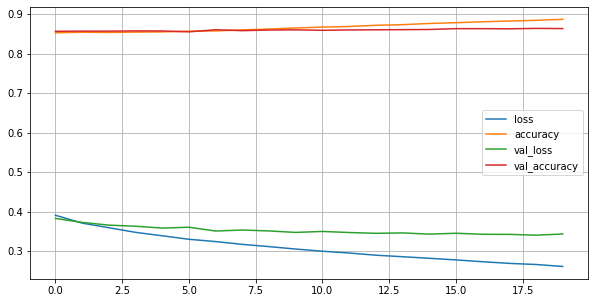

In [45]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

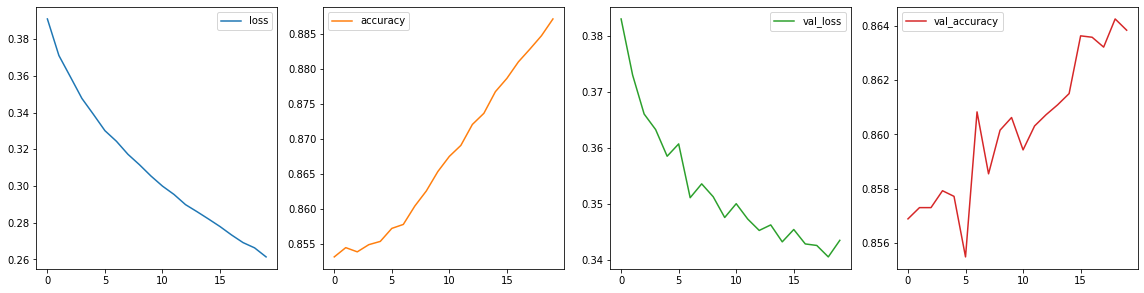

In [46]:
pd.DataFrame(history.history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

In [47]:
history = {'loss':[],'accuracy':[],'val_loss':[], 'val_accuracy':[]}

In [48]:
from copy import copy
def addNewHistory(old_history,new_history):
    history = copy(old_history)
    for i in old_history.keys():
        # print(i)
        history[i]+=new_history.history[i]
    return history

In [49]:
history = addNewHistory(history,new_history)

In [50]:
pickle.dump((history), open(r"E:/nancy/svm/history_3epoch.pickle", "wb") )
history = pickle.load(open(r"E:/nancy/svm/history_3epoch.pickle", "rb"))

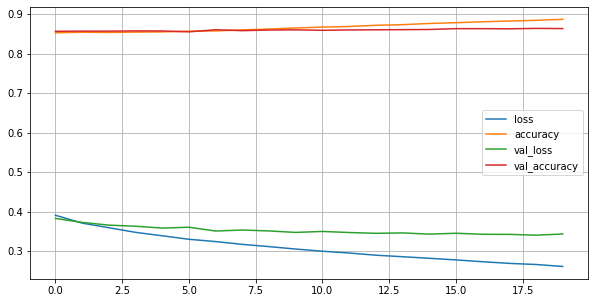

In [51]:
pd.DataFrame(history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

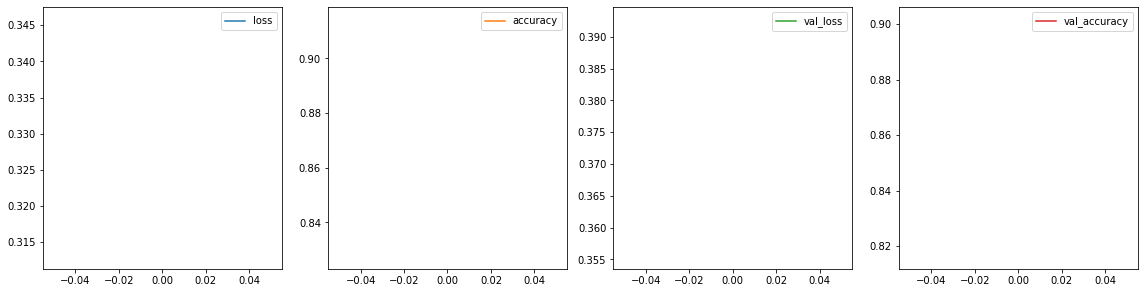

In [48]:
pd.DataFrame(history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

In [44]:
path_y = r"E:/nancy/svm"

In [45]:
kernel = np.ones((9,9),np.uint8) # default
def preprocessor_img(path, image_shape):
  image = cv2.imread(path,0)
  blured = cv2.GaussianBlur(image, (9,9), 0)
  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=30)
  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea) 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)
  cropped = image[y:y+h, x:x+w]
  resized = cv2.resize(cropped, image_shape, interpolation=cv2.INTER_LANCZOS4)
  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)
  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return resized_binary

In [46]:
num_samples = 0
y_true = 0

In [47]:
def generate_batch(orig_data, forg_data, batch_size = 32):

  global num_samples, y_true

  orig_pairs = []
  forg_pairs = []
  gen_gen_labels = []
  gen_for_labels = []
  all_pairs = []
  all_labels = []

  for orig, forg in zip(orig_data, forg_data):
      orig_pairs.extend(list(itertools.combinations(orig, 2)))
      for i in range(len(forg)):
        forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, len(forg)))))
  
  # Label for Genuine-Genuine pairs is 1
  # Label for Genuine-Forged pairs is 0
  gen_gen_labels = [1]*len(orig_pairs)
  gen_for_labels = [0]*len(forg_pairs)
  
  # Concatenate all the pairs together along with their labels and shuffle them
  all_pairs = orig_pairs + forg_pairs
  all_labels = gen_gen_labels + gen_for_labels
  del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
  all_pairs, all_labels = shuffle(all_pairs, all_labels)

  # print(len(all_pairs))
  # pairss = all_pairs
  num_samples = len(all_pairs) 
  y_true = all_labels

  k = 0
  pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
  targets=np.zeros((batch_size,))

  for ix, pair in enumerate(all_pairs):
      img1 = preprocessor_img(pair[0], (img_w, img_h))
      img2 = preprocessor_img(pair[1], (img_w, img_h))
      # img1 = cv2.imread(pair[0],0)
      # img2 = cv2.imread(pair[1],0)
      # img1 = cv2.resize(img1, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
      # img2 = cv2.resize(img2, (img_w, img_h), interpolation=cv2.INTER_LANCZOS4)
      img1 = img1.astype('float32')
      img2 = img2.astype('float32')
      img1 /= 255
      img2 /= 255
      img1 = np.atleast_3d(img1)
      img2 = np.atleast_3d(img2)
      # img2 = img2[...,np.newaxis]
      pairs[0][k, :, :, :] = img1
      pairs[1][k, :, :, :] = img2
      targets[k] = all_labels[ix]

      k += 1
      if k == batch_size:
          # yield np.array(pairs), np.array(targets)
          yield pairs, targets
          k = 0
          pairs=[np.zeros((batch_size, img_h, img_w, img_ch)) for i in range(2)]
          targets=np.zeros((batch_size,))

In [48]:
ff = generate_batch(orig_groups, forg_groups, batch_size = 32)


pairs, targets = next(ff)
pairs, targets = np.array(pairs), np.array(targets)

In [49]:
pairs.shape, targets.shape

((2, 32, 150, 300, 1), (32,))

In [55]:
batch_sz = 100
num_samples

48997

In [56]:
num_samples / batch_sz

489.97

In [57]:
y_pred = siamese_net.predict(
                                      generate_batch(orig_groups, forg_groups, batch_size = batch_sz), 
                                      steps = num_samples/batch_sz,
                                      verbose=1,
                                      )

489/489 [==============================] - 4657s 10s/step


In [58]:
pickle.dump( y_pred, open(path_y + "y_pred.pickle",'wb') )

In [59]:
y_pred = pickle.load(open(path_y + "y_pred.pickle",'rb'))

In [60]:
y_pred

array([[1.2052375e-01],
       [8.8330209e-03],
       [1.5343643e-05],
       ...,
       [8.0389464e-06],
       [2.6833235e-05],
       [6.7788661e-03]], dtype=float32)

In [61]:
y_pred_round = y_pred.round().flatten().astype('int')

In [62]:
y_true = np.array(y_true)

In [63]:
y_pred_round

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
y_true

array([1, 0, 0, ..., 0, 0, 0])

In [65]:
data = {}
data['y_pred'] = y_pred
data['y_pred_round'] = y_pred_round
data['y_true'] = y_true

pickle.dump( data, open(path_y + "y_history_3epoch.pickle",'wb') )

In [66]:
data = pickle.load(open(path_y + "y_history_3epoch.pickle",'rb'))

In [67]:
y_pred_round , y_true = data['y_pred_round'], data['y_true']

In [68]:
y_true.shape, y_true[y_true==0].shape , y_true[y_true==1].shape

((48997,), (43125,), (5872,))

In [69]:
cm = confusion_matrix(y_true, y_pred_round)
cm

ValueError: Found input variables with inconsistent numbers of samples: [48997, 48900]

In [ ]:
# drawing confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm, center = True, annot=True, fmt="d")

plt.title('Confusion Matrix')
plt.tight_layout()

# save the figure
plt.savefig(path_y + "CM.png")


plt.show()

In [70]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred_round)
print("Accuracy : ", accuracy*100, "%")

ValueError: Found input variables with inconsistent numbers of samples: [48997, 48900]

In [71]:
print(classification_report(y_true,y_pred_round,output_dict=False))

ValueError: Found input variables with inconsistent numbers of samples: [48997, 48900]

In [ ]:
cr = classification_report(y_true, y_pred_round, output_dict=True)
pd.DataFrame(cr).T

In [ ]:
fprValue, tprValue, thresholdsValue = roc_curve(y_true, y_pred_round)
print('False Postitve Rate Value : ', fprValue)
print('True Postitve Rate Value Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

In [ ]:
aucValue = auc(fprValue, tprValue)
aucValue2 = roc_auc_score(y_true, y_pred_round)
print('Area Under the Curve Value  : ', aucValue)
print('Area Under the Curve Value  : ', aucValue2)

In [ ]:
plt.figure(figsize=(10,7))

sns.lineplot(x=fprValue, y=tprValue, color='blue');
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--')
plt.fill_between(fprValue, tprValue, facecolor='lightgreen', alpha=0.3)
plt.text(0.95, 0.05, f"AUC = {aucValue:0.3f}", ha='right', fontsize=14, color='blue')
# plt.scatter(fprValue,tprValue)
sns.scatterplot(x=fprValue, y=tprValue, color='blue', alpha=1);

plt.title('Receiver Operating Characteristic (ROC) - cedar')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))

# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.tight_layout()

# save the figure
plt.savefig(path_y + "ROC_cedar.png")

plt.show() 

In [87]:
import sys
import os
from copy import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import collections

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, zero_one_loss, roc_curve, auc, roc_auc_score, f1_score, precision_score, recall_score
import sklearn as sk